<a href="https://colab.research.google.com/github/Baldros/Supervisioned-Learning/blob/main/SKlearnClassifier(Estudo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apresentação:

    Código referente ao estudo do SKlearn, explicar um pouco sobre o o processo
    aprendido e os mecanismos e tals.

**Definição de Classificação:**


```
  Classificação é fundamentalmente um problema de inferência sobre valores
discreto, onde o objetivo é fazer previsões em relação a categorias ou
classes. Essas categorias são geralmente representadas por valores discretos
e distintos, e a tarefa é atribuir corretamente novas instâncias a uma dessas
classes com base no aprendizado a partir de dados rotulados.
```
**Nota:**
```
  O que já foi tratado no notebook de estudo sobre
Regressão não será retomado nesse notebook.
```


# Importações:

    Importanto e ajustando elementos necessários
    para o estudo, como bibliotecas e datasets.

In [ ]:
# Importações
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
# Checando os Datasets:
for name in dir(datasets):
  if "load" in name:
    print(name)

__loader__
load_breast_cancer
load_diabetes
load_digits
load_files
load_iris
load_linnerud
load_sample_image
load_sample_images
load_svmlight_file
load_svmlight_files
load_wine


**Comando dir():**
```
  O comando dir() é frequentemente usado
para explorar a estrutura de um módulo,
objeto ou pacote e descobrir quais
unções, classes e outros atributos estão
isponíveis para uso. Pode ser útil durante
desenvolvimento ou quando você está
prendendo sobre uma biblioteca específica.
```

**Filtragem de Strings**

```
  As vezes, trabalhando com string,
queremos filtrar strings baseadas na sua
construção, sendo assim é muito útil
saber formas de filtrar e selecionar
strings por suas partes.

Uma dessas formas é essa:
'if "trecho da string" in string:'

Note que strings são listas, ou seja,
os mesmos métodos de filtragem de listas
funcionam para filtragem de elementos em
strings.
```

In [ ]:
# Puxando dataset:
iris = datasets.load_iris()

print(type(iris))
print(iris.data.shape)
for key in iris.keys():
  print(key)
print(type(iris.data),type(iris.target))

<class 'sklearn.utils._bunch.Bunch'>
(150, 4)
data
target
frame
target_names
DESCR
feature_names
filename
data_module
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


# Análise Exploratória:

    Entendendo os dados e observando suas principais
    caracteristicas e peculiaridades.

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names);df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


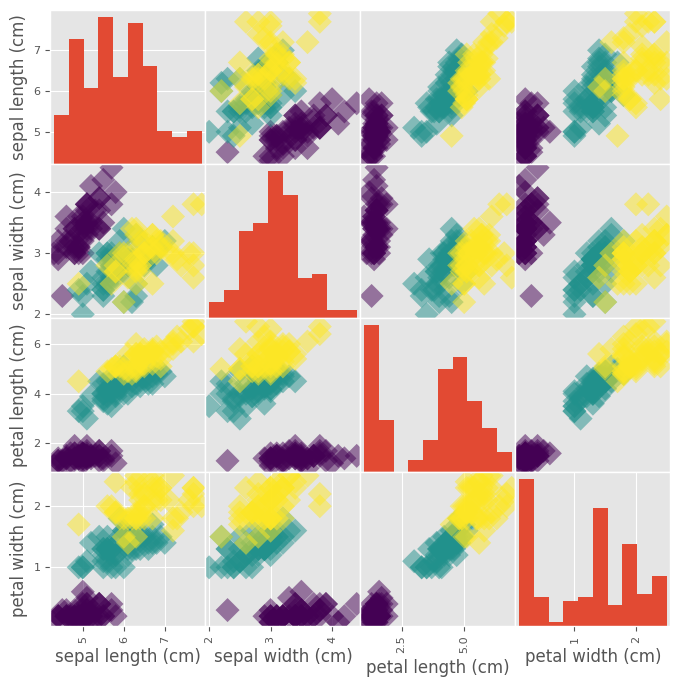

In [ ]:
_= pd.plotting.scatter_matrix(df, c=y, figsize=[8,8],s=150,marker='D')

# Classificação:

**Definições**
```
  Classificação e Regressão nada mais são
do que problemas de inferência. São duas interpretações
para o mesmo tipo de proposito, predição, estimação. O
que difere uma da outra é a natureza dos dados, o que
gera a diferença entre as abordagens de modelagem.

Quando nossa variável alvo para estimação é categoricas,
a predição é chamada de classificação.

O Classificador Utilizado aqui é o
"KNeighborsClassifier" um algoritmo de aprendizado
de máquina baseado em instâncias e inspirado na
modelagem estatística k-nearest neighbors.
```

**k-nearest neighbors**

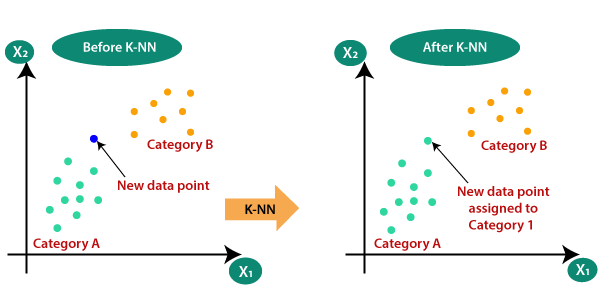


```
  A ideia do KNN basicamente é, escolhido
uma certa quantidade k de vizinhos próximos
ao dado da variável alvo, calcula-se a distância
(Geralmente uma simples Distância Euclidiana),
classificando esse dados de acordo com os vizinhos
mais próximos. É mais simples do que parece,
não atoa costuma ser o mais usado.

  O KNN pode ser utilizado tanto em problemas de
regressão como de classificação. Na classificação
queremos estimar classes, categorias,já na
Regressão, os valores estimados são medidas
de centralidade. Geralmente se trabalha com a média.
```



In [ ]:
# Importando o método da API do SKlearn:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Checando tamanho dos dados:
print(iris['data'].shape)
print(iris['target'].shape)

(150, 4)
(150,)


In [ ]:
# Treinando modelo:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(n_neighbors=6)


**Nota**
```
  Como estamos trabalhando com dados de
estudo, inclusive fornecidos pela própria
biblioteca, não temos contatos com alguns
problemas, mas é válido pontuar que:

1.   Os dados precisam estar com sua tipagem, seu dominio,
corretamente bem definidos.

2.   Dados ausentes costumam quebrar a modelagem, então,
em geral, é necessário que haja um tratamento prévio dos
dados faltantes.

3.   A API (biblioteca) do SKlearn requer que os dados de
entrada (inputs) sejam do tipo array ou DataFrame. No fundo,
o que a API do SKlearn trabalha de fato são com matrizes.

4.   A variável alvo, por sua vez costuma ser uma única coluna,
um array unidimensional,como é o nosso caso aqui inclusive.
No entanto, em tarefas mais avançadas, como aprendizado conjunto
ou aprendizado multimodal, existem abordagens que permitem lidar
com múltiplas variáveis alvo.
```



In [ ]:
# Criando novas entradas a serem testadas:
X_new = np.array([[5.6,2.8,3.9,1.1],
                  [5.7,2.6,3.8,1.3],
                  [4.7,3.2,1.3,0.2]])

print(X_new.shape)

(3, 4)


In [ ]:
# Classificando as novas entradas:
pridiction = knn.predict(X_new)

print('Predição:\n')
for predict in pridiction:
  if predict == 1:
    print('Versicolor')
  if predict ==0:
    print('Setosa')

Predição:

Versicolor
Versicolor
Setosa


# Métodos de Mensuração de Modelo:

## Não existe Machine Learning sem metrificação do modelo!

    É necessário saber se o modelo está performando de forma
    adequada. Aqui veremos algumas formas de alinhar a qualidade
    do modelo proposto e checar se a predição está sendo
    feita de forma optimal.










## Treino/Teste:

    Antes de falar propriamente de metrificação do modelo,
    precisamos definir o processo que permite essa metrificação.

    Separar o dataset entre treino é teste é uma necessidade por
    muitos motivos, um deles é justamente a necessidade de metrificar,
    mensurar a qualidade de predição do modelo.

    Podemos separar o processo de Machine Learning em 3 etapas,
    treino do modelo, validação do modelo e predição. Não faz sentido
    checar a qualidade do modelo na predição, não sabemos o valor real
    na predição, mas podemos checar a qualidade da predição no teste,
    ou seja, na etapa de validação do modelo.

In [ ]:
# Splitando o dataset:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3,
                                                    random_state=21, stratify=y)

In [ ]:
# Preparação do modelo:
knn = KNeighborsClassifier(n_neighbors=6)

In [ ]:
# Treinamento do modelo:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
# Teste do modelo:
y_pred = knn.predict(X_test)
y_pred

array([2, 1, 2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2,
       2, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2,
       1])

## Acurária:
```
  No caso de Classificações, uma métrica comumente
utilizada para mensurar a qualidade do modelo é a
acurácia, sendo definida como a razão, ou seja,
uma fração entre as predições corretas divido
pelo total de previsões.
```

#####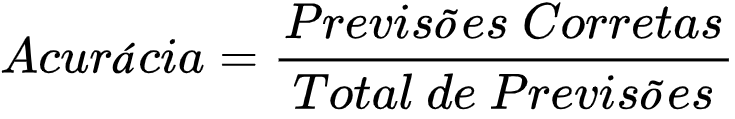



```
  Note que definida dessa forma, a acurácia é uma razão
normalizada, ou seja, com dominio entre (0,1). Deste modo,
ela respeita os princípios de Kolmogorov que definem uma
probabilidade, podendo ser então considerada uma medida de
probabilidade pela pespectiva de Laplace, também conhecida
como "probabilidade ingênua", P(A) = Evento/Espaço Amostral.

  Ou seja, podemos definir a acurácia como a probabilidade
da classificação feita estar correta.
```


In [ ]:
# Checando a precisão do modelo:
acuracia = round(knn.score(X_test,y_test),4)*100 # Passando para porcentagem
print(f'A precisão do modelo é de {acuracia}%')

A precisão do modelo é de 95.56%



**Método Score**
```
  O método score calcula a acurácia
do modelo. Note que as entradas do método
são os arrays de TESTE! Isso porque o
próprio método faz a predição e dai
calcula a acurácia. Ou seja, o método
trabalha em duas etapas.
```


In [ ]:
# Criando a própria função para calculo de acurácia:
def acuracia(predict, valores):
  '''
    Função de metrificação do modelo baseado
  na mensuração por acurácia.
  '''
  # Comparando os arrays:
  comparacao = predict == valores

  # contando os valores:
  num_valores_iguais = np.count_nonzero(comparacao)

  acuracia = num_valores_iguais/len(predict)
  return acuracia

In [ ]:
# Checando a precisão do modelo:
acuracia = round(acuracia(y_pred,y_test),4)*100 # Passando para porcentagem
print(f'A precisão do modelo é de {acuracia}%')

A precisão do modelo é de 95.56%


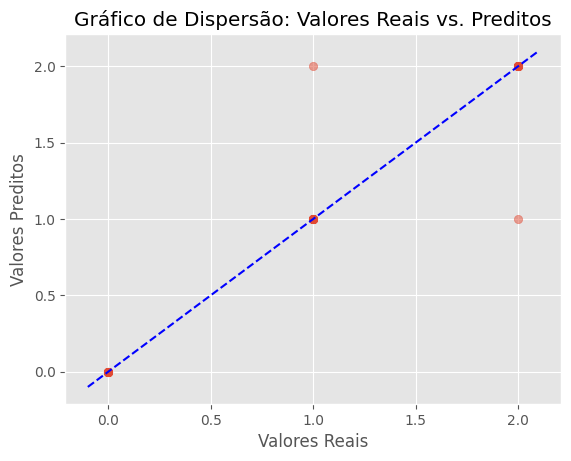

In [ ]:
# Análise Visual:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(plt.gca().get_ylim(), plt.gca().get_ylim(), '--', color='blue')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Gráfico de Dispersão: Valores Reais vs. Preditos')
plt.show()

## Matriz de Confusão:

    Para alguns casos mais complexos, o calculo de acuária anterior, pode não
    ser a melhor escolha. Não é uma questão de estar errado, porém, imagine uma
    situação de classificação de fraude bancária, uma simples divisão de
    predições corretas pelo total não é suficiente. Deste modo, precisa-se
    refinar um pouco melhor o nosso entendimento de predição correta, e dai
    nasce a necessidade de trabalhar com a Matriz de Confusão.
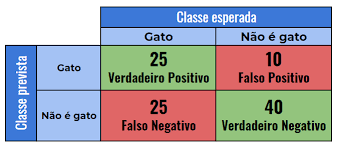

    A matriz de confusão (às vezes também chamada de 'matriz de erro' ou
    'tabela de confusão' ) é uma tabela com duas linhas e duas colunas que
    relata o número de falsos positivos , falsos negativos , verdadeiros
    positivos e verdadeiros negativos.

In [ ]:
# Importações:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Separando os dados de treino e de teste:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3,
                                                    random_state=42, stratify=y)

# Treinando o modelo:
knn.fit(X_train,y_train)

# Fazendo a predição:
y_pred = knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.83      1.00      0.91        15
           2       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



## Acurácia ponderada:

    Deste modo, aqui calcularemos o que definirei aqui como "Acurácia Ponderada",
    só para diferenciar o calculo de acurácia anterior. Onde agora, vamos
    retirar a nossa acurácia de uma Matriz de Confusão.
    
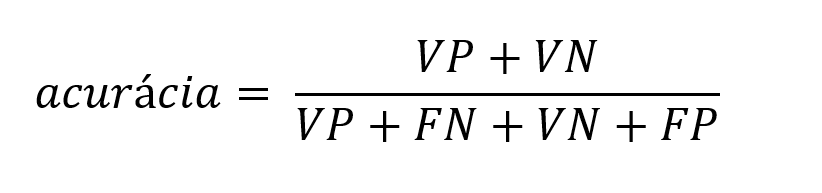

## Precisão:

    Precisão, também chamada de valor preditivo positivo, é outra métrica de
    mensuração da qualidade do modelo que também é construida através da matriz
    de confusão, porém olhando apenas para os valores positivos da predição.
    No nosso caso, este é o número de transações fraudulentas corretamente
    rotuladas dividido pelo número total de transações classificadas como
    fraudulentas. Alta precisão significa ter uma taxa de falsos positivos
    mais baixa. Para o nosso classificador, isso se traduz em menos transações.


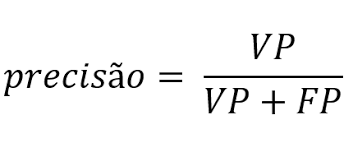

## Recall:

    Recall, também chamado de sensibilidade, é uma métrica parecida com a
    precisão, porém não leva em consideração somente os positivos, mas também
    as predições negativas. A recuperação alta reflete uma taxa mais baixa de
    falsos negativos. Para nosso classificador, significa prever corretamente a
    maioria das transações fraudulentas, o que em alguns casos pode ser bem útil.

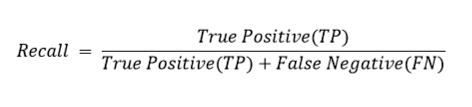

## F1 Score:

    O F1 Score é a média harmônica de precisão e recuperação. Esta métrica
    dá peso igual à precisão e ao recall, portanto leva em consideração tanto o
    número de erros cometidos pelo modelo quanto o tipo de erros. O F1 Score
    favorece modelos com precisão e recall semelhantes e é uma métrica útil
    se estivermos buscando um modelo com desempenho razoavelmente bom em ambas
    as métricas.

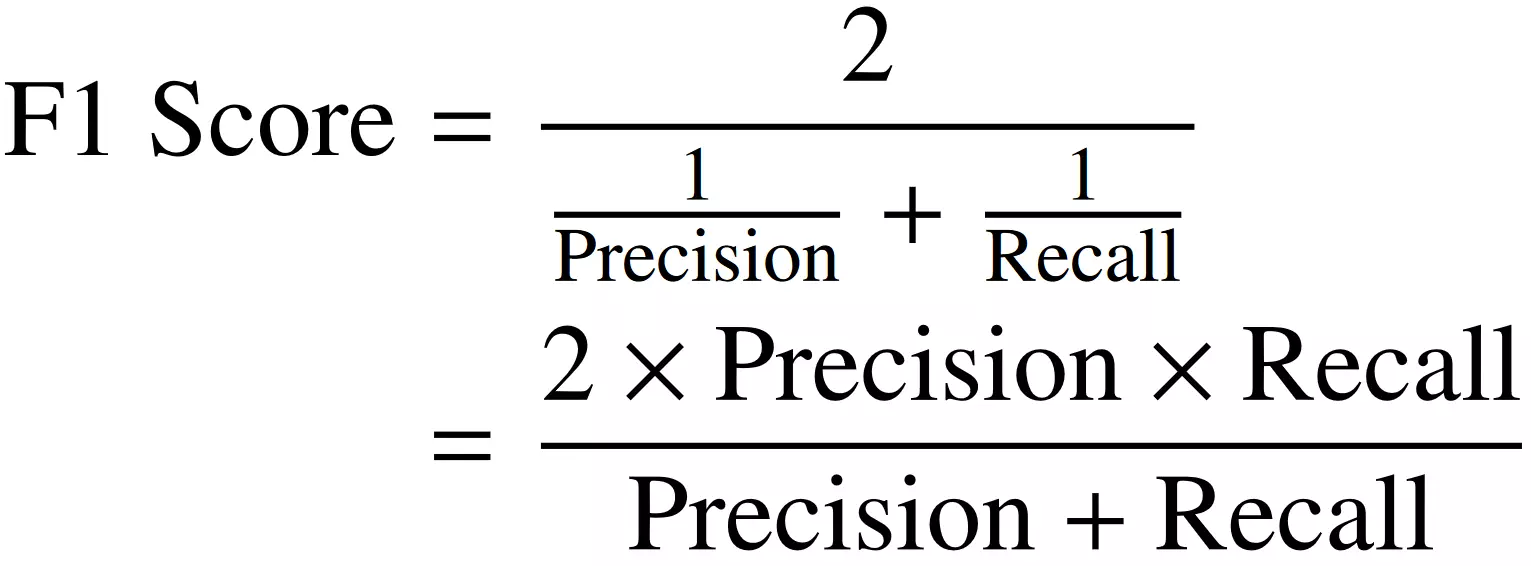

# Análise de Complexidade:

    Um outro fator importante do modelo é a análise de
    complexidade do modelo. No nosso caso aqui, qual é a
    quantidade ideal para k. Existem algumas formas de se
    calcular esse valor, aqui vamos ver de forma visual.

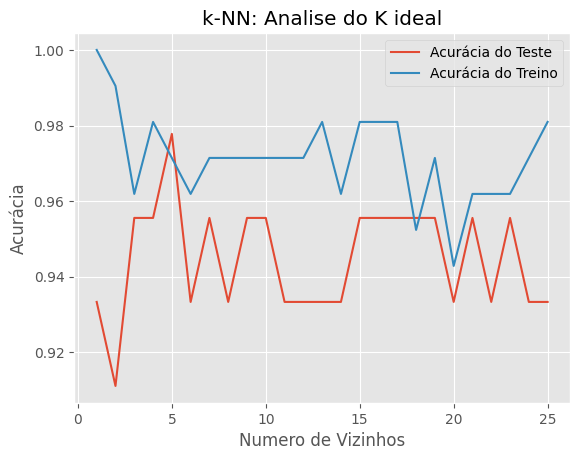

In [ ]:
# Checando a quantidade de vizinho:
neighbors = np.arange(1, 26)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop para checar cada quantidade de vizinhos:
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Gerando a visualização:
plt.title('k-NN: Analise do K ideal')
plt.plot(neighbors, test_accuracy, label = 'Acurácia do Teste')
plt.plot(neighbors, train_accuracy, label = 'Acurácia do Treino')
plt.legend()
plt.xlabel('Numero de Vizinhos')
plt.ylabel('Acurácia')
plt.show()


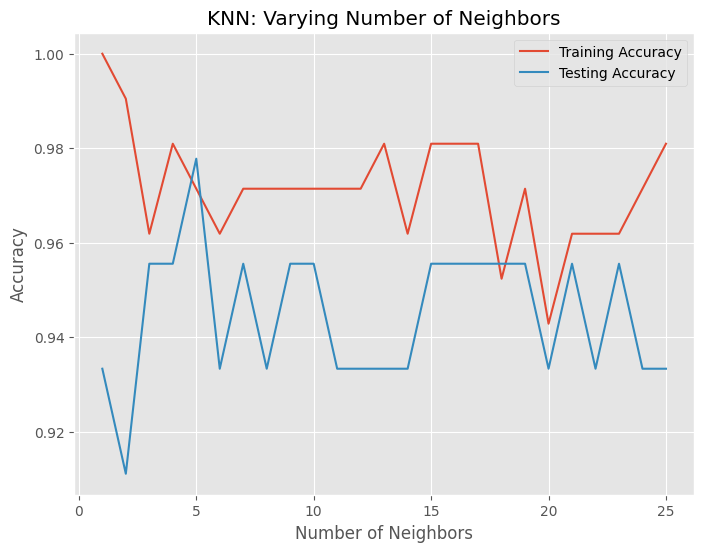

In [ ]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,26)
for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors=neighbor)
  # Fit the classifier to the training data
  knn.fit(X_train,y_train)

  train_accuracies[neighbor] = knn.score(X_train,y_train)
  test_accuracies[neighbor] = knn.score(X_test,y_test)

plt.figure(figsize=(8,6))
plt.title('KNN: Varying Number of Neighbors')
plt.plot(neighbors, train_accuracies.values(),label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()


Qual é a quantidade ideia para k?

    A ideia basicamente é buscar o valor onde as linhas estão mais próximas,
    ou seja.